In [198]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

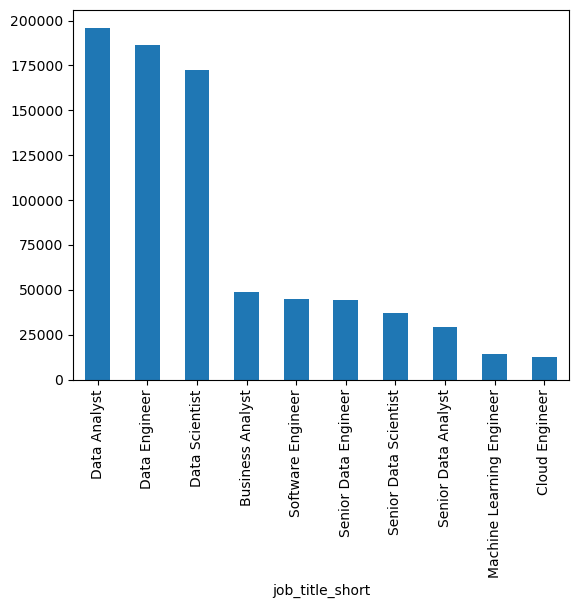

In [200]:
# Create a simple subplot
fig,ax = plt.subplots()

# Plot the data
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.show()

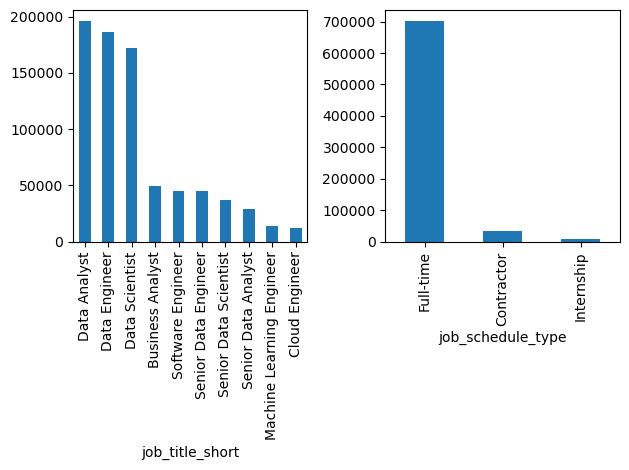

In [204]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

plt.show()

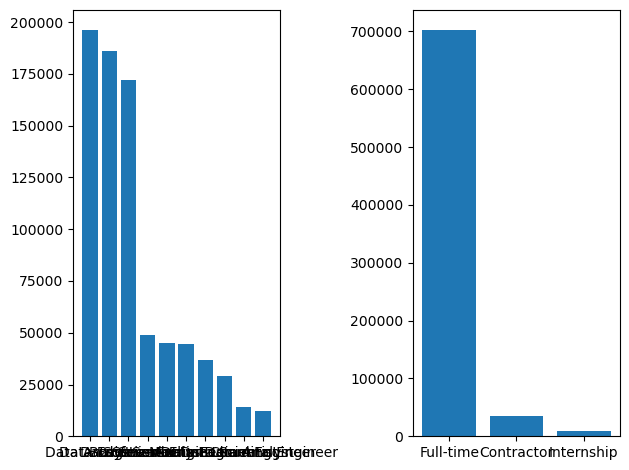

In [206]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

In [207]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_counts = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_counts = skills_counts.reset_index(name='skill_count')
df_skills_counts.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [235]:
job_titles = df_skills_counts['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

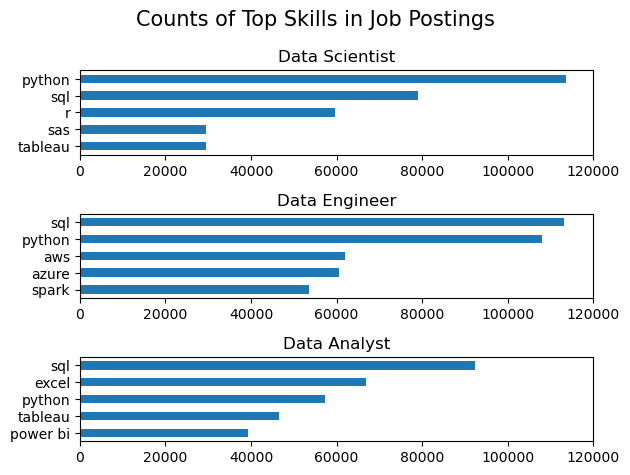

In [242]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = (df_skills_count[df_skills_counts['job_title_short'] == job_title].head(5)
               .plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title))
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000) # make the scales the same

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap

plt.savefig('top_skills.png')
plt.show()

In [220]:
df_skills_count[df_skills_counts['job_title_short'] == 'Machine Learning Engineer'].head(5)

,job_skills,job_title_short,skill_count
1481,python,Machine Learning Engineer,9677
1491,pytorch,Machine Learning Engineer,4388
1954,tensorflow,Machine Learning Engineer,4302
143,aws,Machine Learning Engineer,3781
1824,sql,Machine Learning Engineer,3487


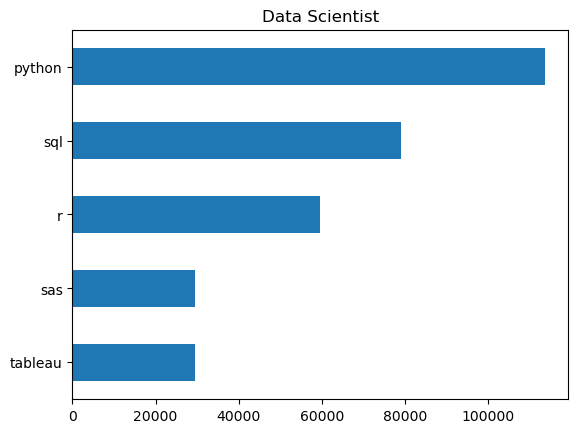

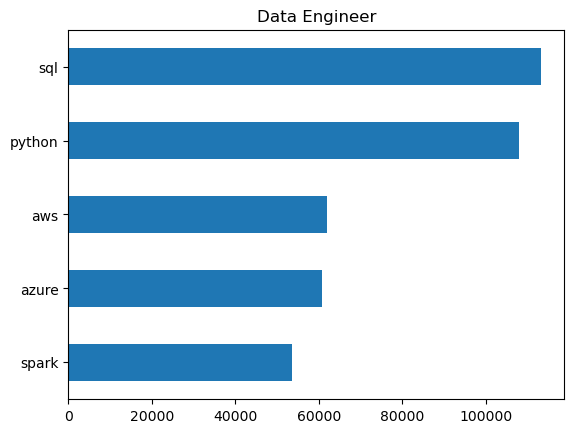

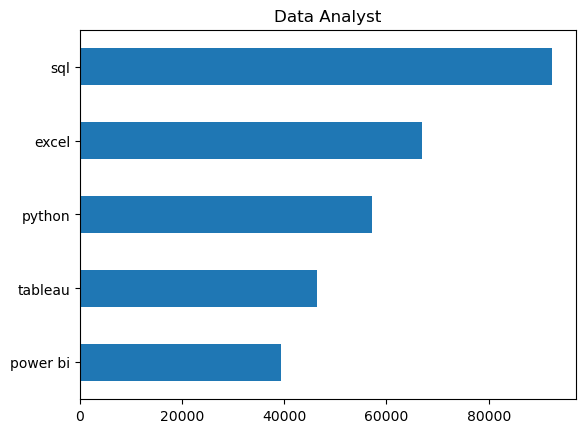

In [240]:
for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', title=job_title)
    plt.gca().invert_yaxis()
    plt.gca().set_ylabel('')
    plt.gca().legend().set_visible(False)
    plt.show()

In [241]:
plt.savefig('top_skills.png')
plt.show()

<Figure size 640x480 with 0 Axes>

# Problems

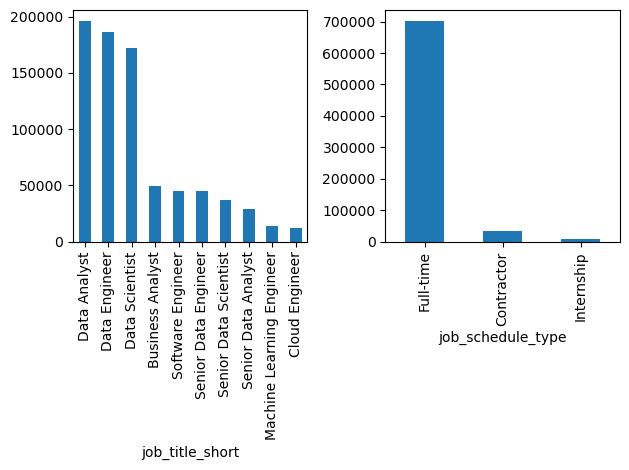

In [246]:
# Subplots with Bat Charts
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

plt.show()


In [257]:
# Subplots with Job Titles by Schedule
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
schedules

['Full-time', 'Part-time', 'Contractor', 'Internship']

In [254]:
df_ex1 = df.copy()
df_ex1 = df_ex1.groupby(['job_title_short', 'job_schedule_type']).size()
df_ex1 = df_ex1.reset_index(name='postings')
df_ex1.sort_values(by='postings', ascending=False, inplace=True)

df_ex1

,job_title_short,job_schedule_type,postings
56,Data Analyst,Full-time,168975
94,Data Engineer,Full-time,165225
127,Data Scientist,Full-time,153278
4,Business Analyst,Full-time,44106
239,Software Engineer,Full-time,42314
...,...,...,...
174,Machine Learning Engineer,Part-time and Full-time,1
41,Cloud Engineer,"Full-time, Part-time, and Internship",1
173,Machine Learning Engineer,Part-time and Contractor,1
229,Senior Data Scientist,Kontraktor,1


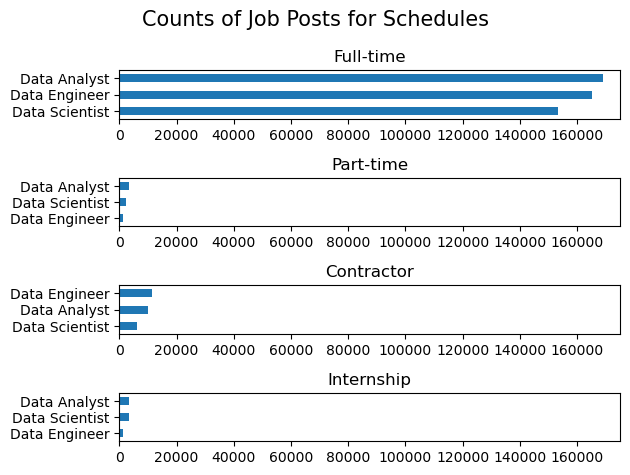

In [266]:
fig, ax = plt.subplots(len(schedules), 1)

for i, schedule in enumerate(schedules):
    df_plot = df_ex1[df_ex1['job_schedule_type'] == schedule].head(3)
    df_plot.plot(kind='barh', x='job_title_short', y='postings', ax=ax[i], title=schedule)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 175000)

fig.suptitle('Counts of Job Posts for Schedules', fontsize=15)
fig.tight_layout()
plt.show()

In [268]:
# Top Skills for Job Roles Subplots
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
job_roles

['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

In [271]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


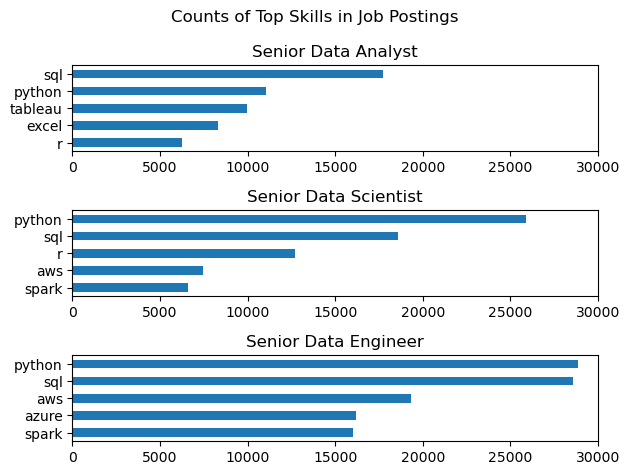

In [274]:
fig, ax = plt.subplots(len(job_roles), 1)

for i, job_title in enumerate(job_roles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 30000)

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
plt.show()